In [9]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import math
import seaborn as sb
from scipy.stats import iqr
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [2]:
df=pd.read_csv("ParisHousingClass.csv")
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic


In [7]:
x = df.drop("category" , axis = 1)
y = df.category
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4,criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


In [11]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [12]:
predictions=clf.predict(X_test)
predictions
## we have to check whether the predicted is accurate or not with the actual values


array(['Basic', 'Basic', 'Basic', ..., 'Basic', 'Basic', 'Basic'],
      dtype=object)

In [13]:
clf.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

100.0

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions,labels=['Basic','Luxury'])

array([[2619,    0],
       [   0,  381]], dtype=int64)

In [16]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, pos_label='Luxury')
precision

1.0

In [17]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions,pos_label='Luxury')

1.0

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions,target_names=['Basic','Luxury']))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      2619
      Luxury       1.00      1.00      1.00       381

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [19]:
feature_names=x.columns
feature_names

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [20]:
clf.feature_importances_,

(array([0.        , 0.        , 0.45500707, 0.25560791, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.28938501,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]),)

this above list is giving the the how important that corresponding feature to determin the result of your prediction

In [21]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
hasYard,0.455007
isNewBuilt,0.289385
hasPool,0.255608
squareMeters,0.000000
hasStormProtector,0.000000
hasGuestRoom,0.000000
hasStorageRoom,0.000000
garage,0.000000
attic,0.000000
basement,0.000000


In [22]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['hasYard', 'isNewBuilt', 'hasPool']

<Axes: >

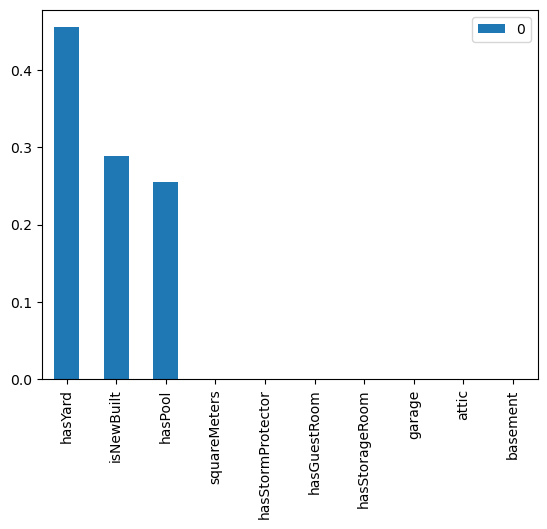

In [23]:
feature_importance.head(10).plot(kind='bar')

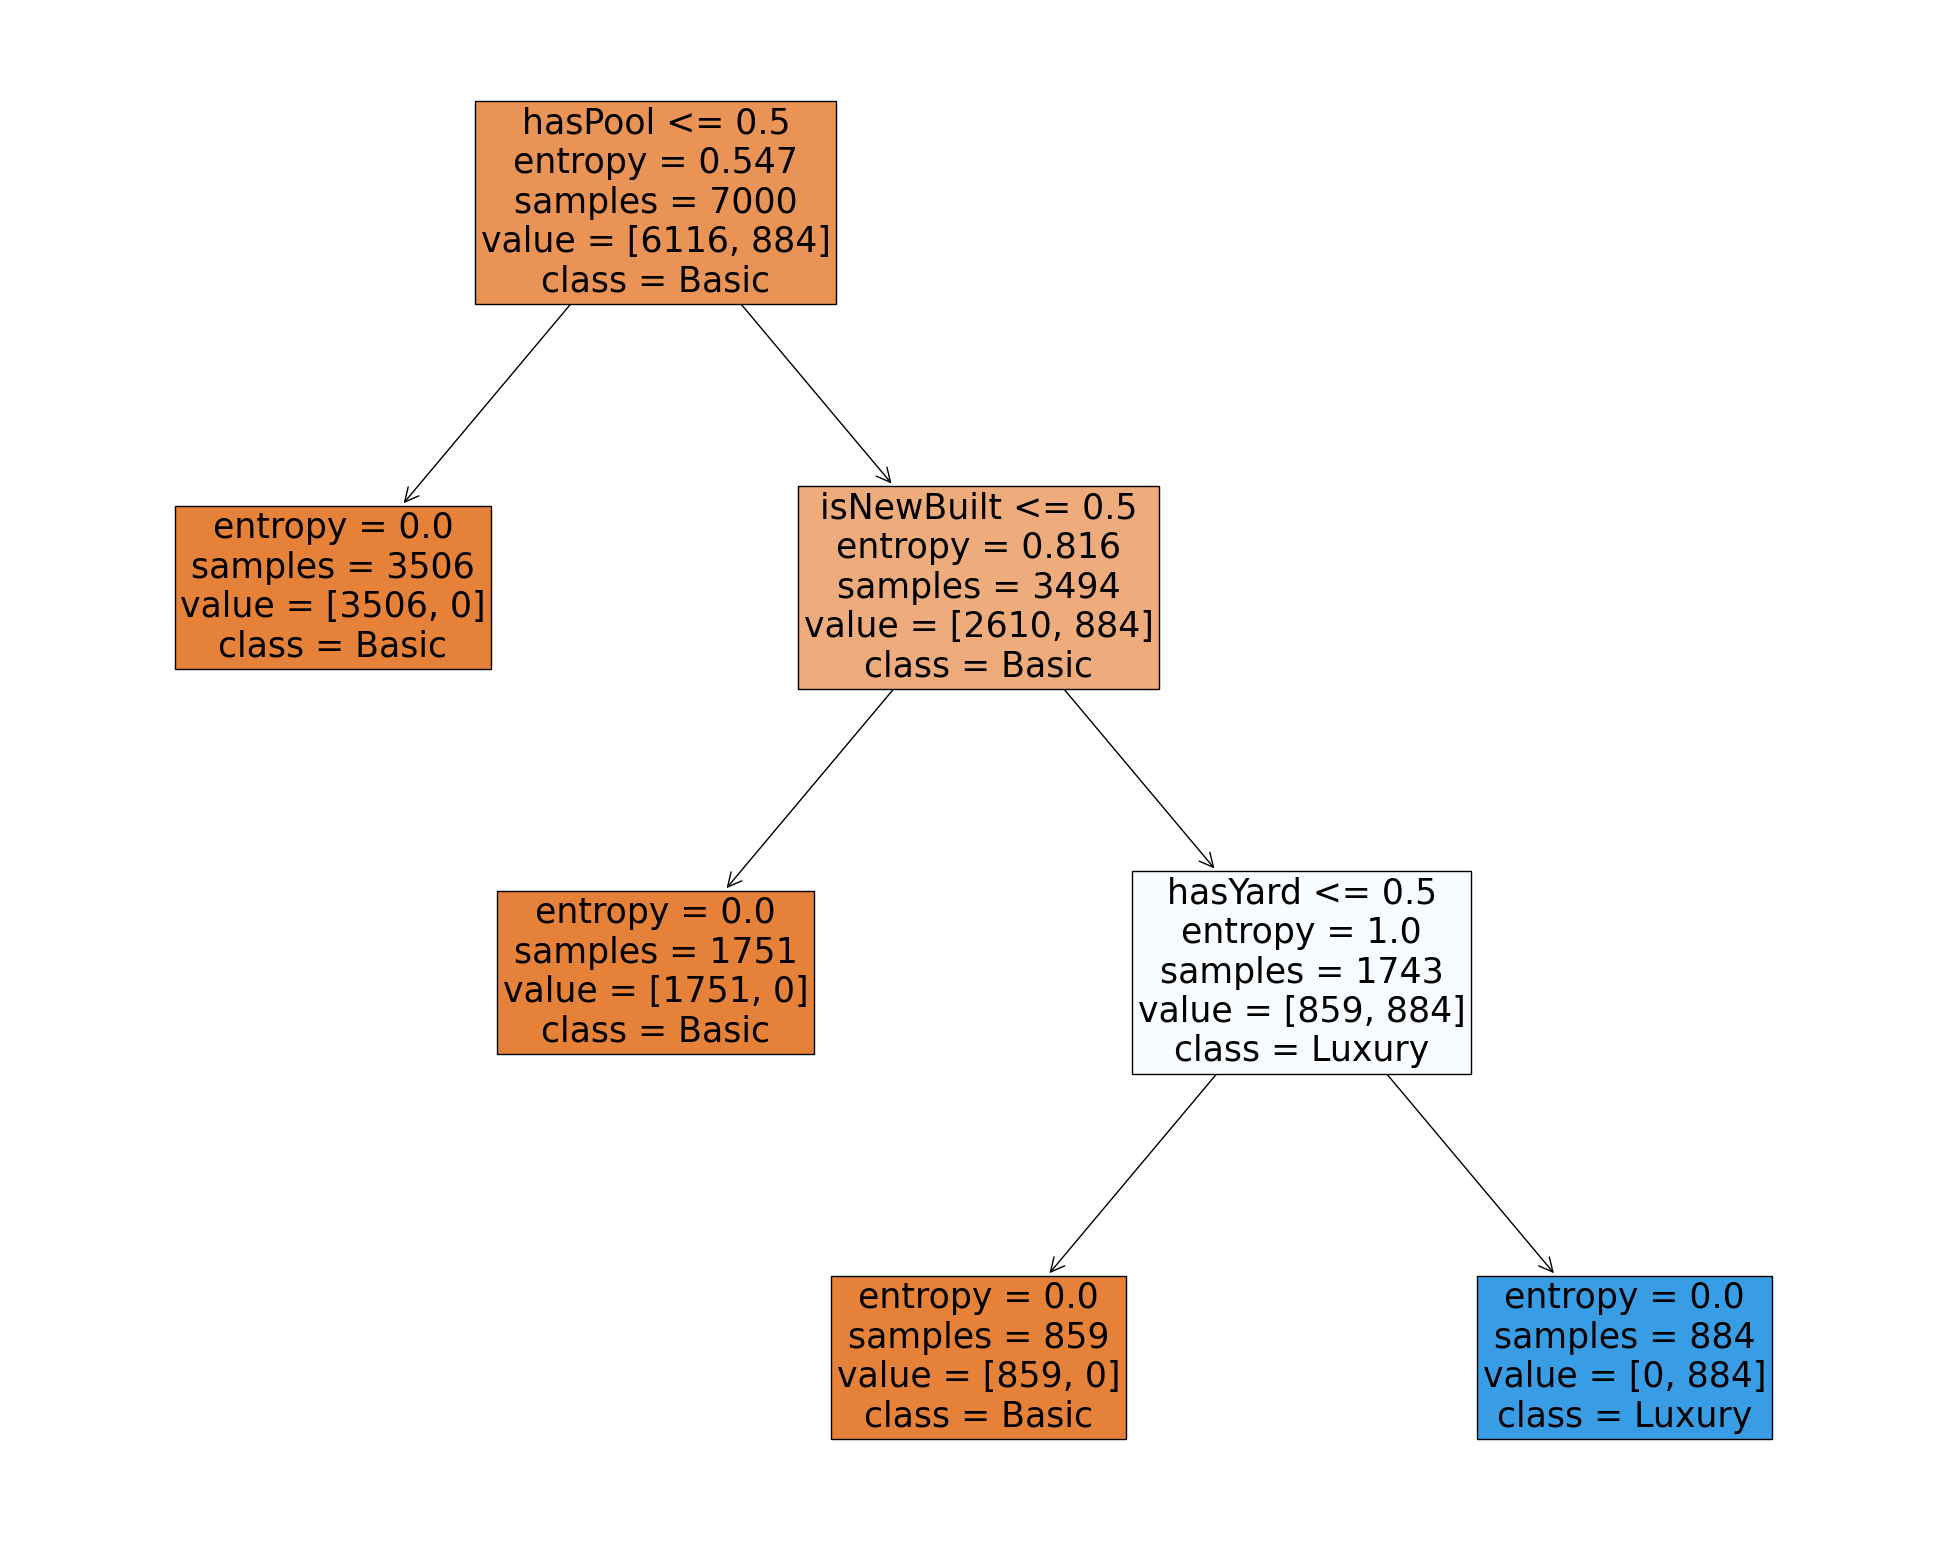

In [24]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names={0:'Basic', 1:'Luxury'},
                   filled=True,
                  fontsize=25)